<a href="https://colab.research.google.com/github/Rogerio-mack/ChatGPT_Python/blob/main/ChatGPT3_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 



# **ChatGPT with Python**

# Before Start

Primeiro você precisa criar uma conta OpenAI (gratuita):

* https://platform.openai.com/signup/, ou em 
* https://openai.com/blog/openai-api. 

Depois você precisará criar uma chave de API que permitirá você enviar solicitações ao OpenAI: 

* https://platform.openai.com/account/api-keys

Você pode verificar os preços e uso dos serviços nos mesmos site. Proteja sua API Key e, particularmente, não deixe ela em repositórios públicos.


# Install

In [ ]:
!pip install --upgrade openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 7.5 MB/s eta 0:00:00


# Access

In [ ]:
import openai

In [ ]:
openai.api_key = "YOUR PRIVATE-KEY" 

MODEL = "gpt-3.5-turbo"
CONTENT = "Hello ChatGPT!"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

In [ ]:
response

<OpenAIObject chat.completion id=chatcmpl-7JYGsbWkZMyZzAqUJ6kWVSGOsGzAa at 0x7f9266953b50> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Hello! How can I assist you today?",
        "role": "assistant"
      }
    }
  ],
  "created": 1684894326,
  "id": "chatcmpl-7JYGsbWkZMyZzAqUJ6kWVSGOsGzAa",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 9,
    "prompt_tokens": 13,
    "total_tokens": 22
  }
}

In [ ]:
print(response.choices[0].message.content)

Hello! How can I assist you today?


# Make a Question

In [ ]:
CONTENT = "Você pode me dizer 3 livros de impacto dos últimos 20 anos na economia moderna?"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

1. "A Riqueza das Nações" de Adam Smith (1776)
2. "Capital no Século XXI" de Thomas Piketty (2013)
3. "A Economia do Bem Comum" de Christian Felber (2012)


# Create a Image

In [ ]:
from IPython.display import HTML

In [ ]:
def createImageWithGPT(prompt): 
  completion = openai.Image.create(
  prompt=prompt,
  n=1,
  size="512x512"
  )
  return HTML("<img src =" + completion.data[0].url + ">")

  

In [ ]:
createImageWithGPT('Finanças com Python')

# Automação de SO

In [ ]:
CONTENT = """Forneça o comando linux para procurar todos arquivos *openai*.py 
em todos as pastas de subspastas do diretório /usr?"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

O comando seria: 

```
find /usr -name "*openai*.py"
``` 

Este comando utilizará o comando `find` para buscar recursivamente por todos os arquivos *openai*.py no diretório /usr e suas subpastas.


## Empregando diretamente a saída

In [ ]:
!find /usr -name '*openai*.py'  

/usr/local/lib/python3.10/dist-packages/openai/openai_object.py
/usr/local/lib/python3.10/dist-packages/openai/openai_response.py
/usr/local/lib/python3.10/dist-packages/openai/_openai_scripts.py


## Empregando a saída como entrada para um programa

In [ ]:
cmd = response.choices[0].message.content.split("```")[1].rstrip().lstrip()
cmd

'find /usr -name "*openai*.py"'

In [ ]:
import os

os.system(cmd + ' > output.txt')

0

In [ ]:
!cat output.txt

/usr/local/lib/python3.10/dist-packages/openai/openai_object.py
/usr/local/lib/python3.10/dist-packages/openai/openai_response.py
/usr/local/lib/python3.10/dist-packages/openai/_openai_scripts.py


# Automação de Python

In [ ]:
CONTENT = """Crie um DataFrame do valor Diário de Ações da Bolsa com os seguintes atributos:

Nome do Ativo,
Data,
Valor_Abertura,
Valor_Fechamento

Popule com 20 dados fictícios.
"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

import pandas as pd
import numpy as np

# Criando a lista com os dados fictícios
ativos = ['PETR4', 'VALE3', 'BBAS3', 'ITSA4', 'BBDC4', 'ITUB4', 'B3SA3', 'ABEV3', 'VVAR3', 'JBSS3', 'GOAU4', 'IRBR3', 'ELET3', 'GOLL4', 'RENT3', 'USIM5', 'COGN3', 'LCAM3', 'CSNA3', 'AZUL4']
datas = pd.date_range(start='2022-01-01', end='2022-01-20', freq='D')
valores_abertura = np.random.uniform(low=20, high=100, size=20).round(2)
valores_fechamento = np.random.uniform(low=20, high=100, size=20).round(2)

# Criando o DataFrame
df = pd.DataFrame({'Nome do Ativo': ativos,
                   'Data': datas,
                   'Valor_Abertura': valores_abertura,
                   'Valor_Fechamento': valores_fechamento})

# Visualizando as primeiras linhas do DataFrame
df.head()


## Empregando diretamente a saída

In [ ]:
import pandas as pd
import numpy as np

# Criando a lista com os dados fictícios
ativos = ['PETR4', 'VALE3', 'BBAS3', 'ITSA4', 'BBDC4', 'ITUB4', 'B3SA3', 'ABEV3', 'VVAR3', 'JBSS3', 'GOAU4', 'IRBR3', 'ELET3', 'GOLL4', 'RENT3', 'USIM5', 'COGN3', 'LCAM3', 'CSNA3', 'AZUL4']
datas = pd.date_range(start='2022-01-01', end='2022-01-20', freq='D')
valores_abertura = np.random.uniform(low=20, high=100, size=20).round(2)
valores_fechamento = np.random.uniform(low=20, high=100, size=20).round(2)

# Criando o DataFrame
df = pd.DataFrame({'Nome do Ativo': ativos,
                   'Data': datas,
                   'Valor_Abertura': valores_abertura,
                   'Valor_Fechamento': valores_fechamento})

# Visualizando as primeiras linhas do DataFrame
df.head()

,Nome do Ativo,Data,Valor_Abertura,Valor_Fechamento
0,PETR4,2022-01-01,41.96,69.70
1,VALE3,2022-01-02,78.27,29.25
2,BBAS3,2022-01-03,86.24,64.38
3,ITSA4,2022-01-04,60.05,44.13
4,BBDC4,2022-01-05,46.31,77.81


## Empregando a saída como entrada para um programa

In [ ]:
del df

In [ ]:
exec( response.choices[0].message.content )
df.head()

,Nome do Ativo,Data,Valor_Abertura,Valor_Fechamento
0,PETR4,2022-01-01,97.31,96.61
1,VALE3,2022-01-02,36.53,86.89
2,BBAS3,2022-01-03,26.20,99.33
3,ITSA4,2022-01-04,96.88,62.66
4,BBDC4,2022-01-05,95.00,39.31


In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
retornar os valores médios de Valor_Abertura e Valor_Fechamento diários."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

Para retornar os valores médios de Valor_Abertura e Valor_Fechamento diários no DataFrame anterior, basta usar o método `groupby` do Pandas para agrupar os valores por Data e, em seguida, aplicar o método `mean` para calcular as médias dos valores de cada grupo. O código ficaria assim:

```python
df.groupby('Data')[['Valor_Abertura', 'Valor_Fechamento']].mean()
```

O resultado será um novo DataFrame com as médias diárias de cada uma das colunas selecionadas.


## Empregando diretamente a saída

In [ ]:
df.groupby('Data')[['Valor_Abertura', 'Valor_Fechamento']].mean()

,Valor_Abertura,Valor_Fechamento
Data,,
2022-01-01,97.31,96.61
2022-01-02,36.53,86.89
2022-01-03,26.20,99.33
2022-01-04,96.88,62.66
2022-01-05,95.00,39.31
2022-01-06,34.92,32.15
2022-01-07,60.65,93.69
2022-01-08,28.05,53.89
2022-01-09,60.62,27.36


In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
para criar um gráfico da evolução dos valores médios diários de Valor_Abertura e Valor_Fechamento."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

Supondo que o DataFrame se chame "dados", o código seria:

```python
import matplotlib.pyplot as plt

# calcular os valores médios diários de Valor_Abertura e Valor_Fechamento
media_abertura = dados.groupby('Data')['Valor_Abertura'].mean()
media_fechamento = dados.groupby('Data')['Valor_Fechamento'].mean()

# criar um gráfico de linhas com os valores médios diários
plt.plot(media_abertura.index, media_abertura.values, label='Abertura')
plt.plot(media_fechamento.index, media_fechamento.values, label='Fechamento')

# adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.title('Evolução dos valores médios diários de Abertura e Fechamento')

# exibir o gráfico
plt.show()
```

Neste código, usamos o método `groupby()` para agrupar os dados pelo campo "Data" e calcular o valor médio de "Valor_Abertura" e "Valor_Fechamento" para cada dia. Depois, criamos um gráfico de linhas com os valores médios diários. Por fim, adicionamos legendas e título ao gráfico e 

## Empregando diretamente a saída

Aqui, tive de fazer um pequeno ajuste no código, trocando `dados` por `df`. Ainda ajustei ao tamanho da figura. 

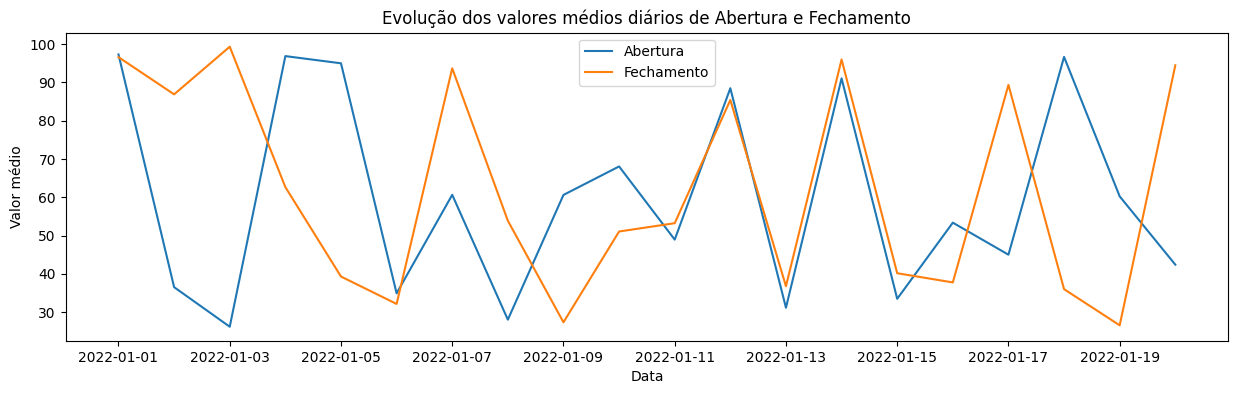

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
# calcular os valores médios diários de Valor_Abertura e Valor_Fechamento
media_abertura = df.groupby('Data')['Valor_Abertura'].mean()
media_fechamento = df.groupby('Data')['Valor_Fechamento'].mean()

# criar um gráfico de linhas com os valores médios diários
plt.plot(media_abertura.index, media_abertura.values, label='Abertura')
plt.plot(media_fechamento.index, media_fechamento.values, label='Fechamento')

# adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.title('Evolução dos valores médios diários de Abertura e Fechamento')

# exibir o gráfico
plt.show()

# Langchain

In [ ]:
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.2/892.2 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = openai.api_key



## **CASE European Energy** 

<br>

<img src="https://camo.githubusercontent.com/a1a0f0c83b5fce8c06f95188889bf5bc4e63939541930179f8c0c5b406fb9ae1/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313533323630313232343437362d3135633739663266376135313f69786c69623d72622d312e322e3126697869643d65794a6863484266615751694f6a45794d446439266175746f3d666f726d6174266669743d63726f7026773d3133353026713d3830" width=300, align="left">




In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/energy_types.csv') 
df.head()

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346


In [ ]:
pd_agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [ ]:
pd_agent.run('Qual o percentual de energia eólica produzida em 2018?')



> Entering new AgentExecutor chain...
Thought: I need to calculate the percentage of wind energy produced in 2018
Action: python_repl_ast
Action Input: df[df['type'] == 'Wind']['2018'].sum() / df['2018'].sum()
Observation: 0.10595745918122858
Thought: I now know the final answer
Final Answer: 10.6%

> Finished chain.


'10.6%'

In [ ]:
df[df['type'] == 'Wind']['2018'].sum() / df['2018'].sum()

0.10595745918122858

In [ ]:
pd_agent.run('Qual país apresenta maior produção de energia nuclear?')



> Entering new AgentExecutor chain...
Thought: Preciso comparar os valores de produção de energia nuclear de cada país
Action: python_repl_ast
Action Input: df.groupby('country_name')['Nuclear'].sum().sort_values(ascending=False).head(1)
Observation: KeyError: 'Column not found: Nuclear'
Thought: Preciso filtrar o dataframe para obter somente os dados de energia nuclear
Action: python_repl_ast
Action Input: df[df['type'] == 'Nuclear'].groupby('country_name')['2018'].sum().sort_values(ascending=False).head(1)
Observation: country_name
France    393153.254
Name: 2018, dtype: float64
Thought: Agora eu sei qual país apresenta maior produção de energia nuclear
Final Answer: O país com maior produção de energia nuclear é a França.

> Finished chain.


'O país com maior produção de energia nuclear é a França.'

In [ ]:
df[df['type'] == 'Nuclear'].groupby('country_name')['2018'].sum().sort_values(ascending=False).head(5)

country_name
France     393153.254
Ukraine     84397.900
Germany     72274.133
Sweden      65801.155
Spain       53270.800
Name: 2018, dtype: float64